In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [17]:
d0 = pd.read_csv('hmm_results/ubersum.csv')
d1 = pd.read_csv('hmm_results/train.csv')
d2 = pd.read_csv('hmm_results/sample.csv')
d3 = pd.read_csv('hmm_results/map.csv')
d4 = pd.read_csv('hmm_results/marginal.csv')

In [18]:
d0

,plate_size,time
0,8,0.001270
1,16,0.001213
2,24,0.001247
3,32,0.001263
4,40,0.001198
5,48,0.001501
6,56,0.001241
7,64,0.001206
8,72,0.001224
9,80,0.001210


In [20]:
y0 = np.sqrt(d0['time'].values)
y1 = np.sqrt(d1['time'].values)
y2 = np.sqrt(d2['time'].values)
y3 = np.sqrt(d3['time'].values)
y4 = np.sqrt(d4['time'].values)
x = d0['plate_size'].values

In [36]:
matplotlib.rcParams.update({'font.size': 7})
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

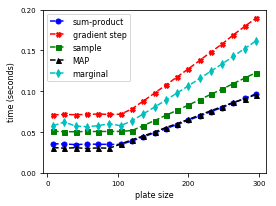

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
ax.plot(x[::2], y0[::2], 'bo--', markersize=5, label='sum-product')
ax.plot(x[::2], y1[::2], 'rX--', markersize=5, label='gradient step')
ax.plot(x[::2], y2[::2], 'gs--', markersize=5, label='sample')
ax.plot(x[::2], y3[::2], 'k^--', markersize=5, label='MAP')
ax.plot(x[::2], y4[::2], 'cd--', markersize=5, label='marginal')
ax.set_xlabel('plate size', fontsize=8)
ax.set_ylabel('time (seconds)', fontsize=8)
leg = plt.legend(prop={'size': 8})
plt.yticks([0., 0.05, 0.1, 0.15, 0.2])
plt.xticks([0, 100, 200, 300])
fig.savefig('sumprod_runtime.eps')
